In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Wholesale+Customers+Data.csv")

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [ ]:
#Use methods of descriptive statistics to summarize data. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

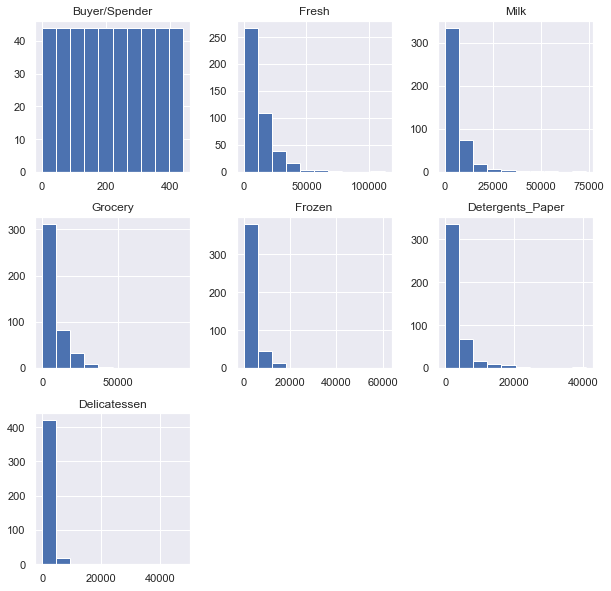

In [6]:
df.hist(figsize=(10,10));

In [ ]:
#Which Region and which Channel spent the most? Which Region and which Channel spent the least?

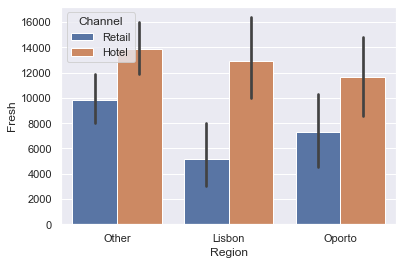

In [10]:
sns.barplot(data= df, x='Region', y= 'Fresh',hue='Channel');

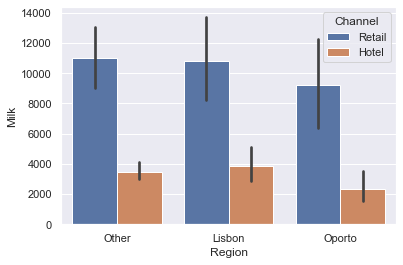

In [11]:
sns.barplot(data= df, x='Region', y= 'Milk',hue='Channel');

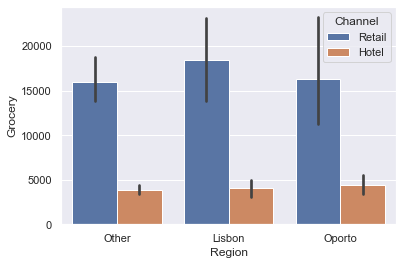

In [12]:
sns.barplot(data= df, x='Region', y= 'Grocery',hue='Channel');

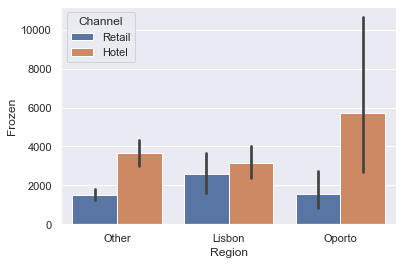

In [13]:
sns.barplot(data= df, x='Region', y= 'Frozen',hue='Channel');

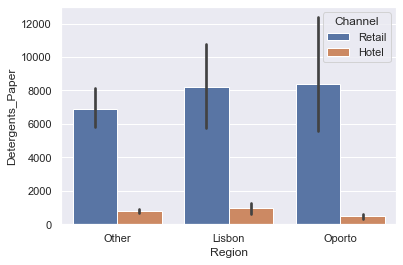

In [14]:
sns.barplot(data= df, x='Region', y= 'Detergents_Paper',hue='Channel');

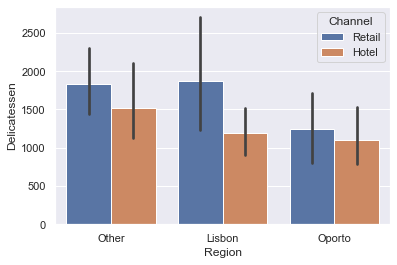

In [15]:
sns.barplot(data= df, x='Region', y= 'Delicatessen',hue='Channel');

In [7]:
df1=df.groupby(["Channel","Region"]).sum()
df1

Buyer/Spender    Fresh     Milk  Grocery  Frozen  \
Channel Region                                                     
Hotel   Lisbon          14026   761233   228342   237542  184512   
        Oporto           8988   326215    64519   123074  160861   
        Other           48020  2928269   735753   820101  771606   
Retail  Lisbon           4069    93600   194112   332495   46514   
        Oporto           5911   138506   174625   310200   29271   
        Other           16006  1032308  1153006  1675150  158886   

                Detergents_Paper  Delicatessen  
Channel Region                                  
Hotel   Lisbon             56081         70632  
        Oporto             13516         30965  
        Other             165990        320358  
Retail  Lisbon            148055         33695  
        Oporto            159795         23541  
        Other             724420        191752

In [7]:
df2=df.groupby("Channel").agg('sum')
df2

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [8]:
dfa=df.groupby("Channel").describe().T
dfa

Channel                         Hotel        Retail
Buyer/Spender    count     298.000000    142.000000
                 mean      238.369128    183.000000
                 std       120.910343    132.136132
                 min         4.000000      1.000000
                 25%       137.250000     61.250000
                 50%       241.500000    166.500000
                 75%       344.500000    303.750000
                 max       440.000000    438.000000
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

In [9]:
df3=df.groupby("Region").agg('sum')
df3

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


In [10]:
dfb=df.groupby("Region").describe().T
dfb

Region                        Lisbon        Oporto          Other
Buyer/Spender    count     77.000000     47.000000     316.000000
                 mean     235.000000    317.000000     202.613924
                 std       22.371857     13.711309     143.615303
                 min      197.000000    294.000000       1.000000
                 25%      216.000000    305.500000      79.750000
                 50%      235.000000    317.000000     158.500000
                 75%      254.000000    328.500000     361.250000
                 max      273.000000    340.000000     440.000000
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

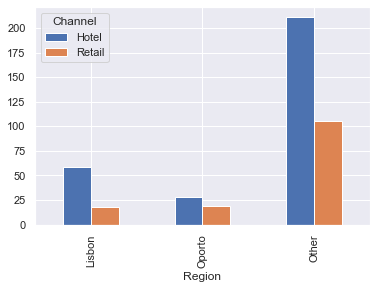

Channel  Hotel  Retail
Region                
Lisbon      59      18
Oporto      28      19
Other      211     105


In [10]:
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

categorical_multi(i='Region',j='Channel') 

In [11]:
df.Region.value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [12]:
df.Channel.value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

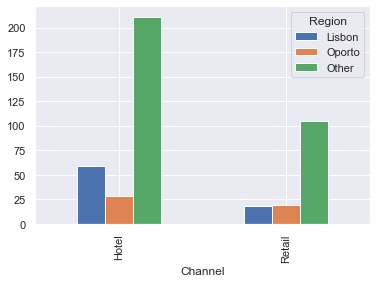

Region   Lisbon  Oporto  Other
Channel                       
Hotel        59      28    211
Retail       18      19    105


In [11]:
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

categorical_multi(i='Channel',j='Region') 

In [12]:
#On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [13]:
df.corr()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


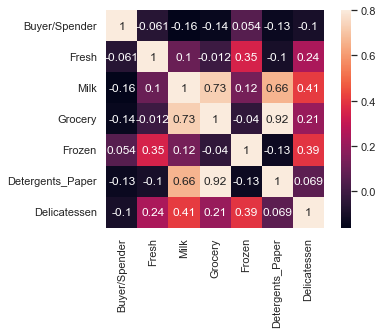

In [14]:
df.corr()
sns.heatmap(df.corr(),vmax=.8, square=True,annot=True);

In [15]:
#variance
df.var()

Buyer/Spender       1.617000e+04
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

In [18]:
#Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

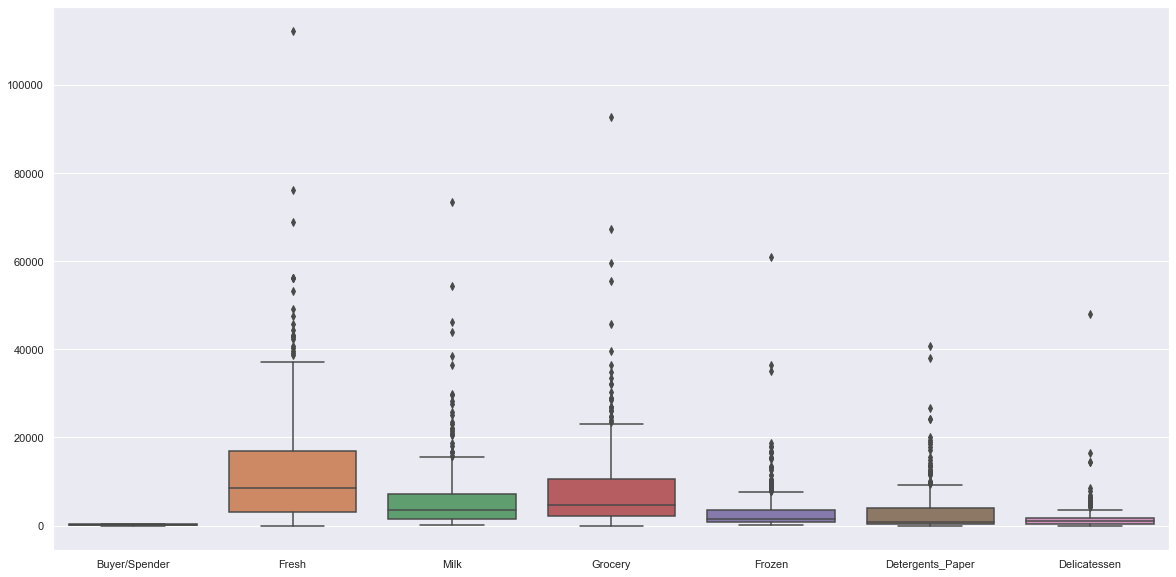

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()